# Import libraries


In [ ]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 9.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np 
# Allows for further data manipulation and analysis
import io # Allows to work with and manipulate data streams
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates

import time

import yfinance as yf

from google.colab import files # Allows data files to be uploaded to the notebook

# Upload the files

In [ ]:
data_file = files.upload()

Saving LSTMModelWeights.csv to LSTMModelWeights.csv
Saving LSTMModelData.csv to LSTMModelData.csv
Saving HiddenMarkovModelWeights.csv to HiddenMarkovModelWeights.csv
Saving HiddenMarkovModelData.csv to HiddenMarkovModelData.csv
Saving BayesianLinearRegressionWeights.csv to BayesianLinearRegressionWeights.csv
Saving BayesianLinearRegressionData.csv to BayesianLinearRegressionData.csv
Saving Mean-VarianceBenchmark.csv to Mean-VarianceBenchmark.csv
Saving EqualAllocationBenchmark.csv to EqualAllocationBenchmark.csv


# Put the data into pandas dataframes

In [ ]:
LSTM_data = pd.read_csv(io.StringIO(data_file['LSTMModelData.csv'].decode('utf-8')))
LSTM_data = LSTM_data.set_index("Date")

In [ ]:
HMM_data = pd.read_csv(io.StringIO(data_file['HiddenMarkovModelData.csv'].decode('utf-8')))
HMM_data = HMM_data.set_index("Date")

In [ ]:
Bayesian_data = pd.read_csv(io.StringIO(data_file['BayesianLinearRegressionData.csv'].decode('utf-8')))
Bayesian_data = Bayesian_data.set_index("Date")

In [ ]:
EqualAll_data = pd.read_csv(io.StringIO(data_file['EqualAllocationBenchmark.csv'].decode('utf-8')))
EqualAll_data = EqualAll_data.set_index("Date")

In [ ]:
Mean_Var_data = pd.read_csv(io.StringIO(data_file['Mean-VarianceBenchmark.csv'].decode('utf-8')))
Mean_Var_data = Mean_Var_data.set_index("Date")

# Get Stock price data for the test year for asset evaluation

In [ ]:
all_stocks = ["^GSPC", "^FTLC", "^RUT", "IEUS", "GOVT", "IGOV", "SIVR", "SGOL"]

In [ ]:
def get_all_closes_of_stocks(tickers):
  i = 0
  stock_list = pd.DataFrame()
  for ticker in tickers:
    stock = yf.Ticker(ticker)        
    data = stock.history(start="2012-02-24",end ="2022-02-25")
    data.drop(data.columns[[0,1,2,4,5,6]], axis=1, inplace=True) # Just gets the adjacent close for each asset
    data.columns = [ticker]
    stock_list[ticker] = data.iloc[:,0]
  return stock_list.dropna()
stock_data = get_all_closes_of_stocks(all_stocks)
stock_test_data = stock_data.iloc[-252:]
stock_test_data

,^GSPC,^FTLC,^RUT,IEUS,GOVT,IGOV,SIVR,SGOL
Date,,,,,,,,
2021-02-04,3871.739990,3728.500000,2202.419922,62.398155,26.657953,53.760994,25.459999,17.240000
2021-02-05,3886.830078,3730.100098,2233.330078,63.050873,26.618422,54.010029,25.950001,17.410000
2021-02-08,3915.590088,3746.800049,2289.760010,63.391842,26.628304,54.069794,26.410000,17.580000
2021-02-09,3911.229980,3751.399902,2299.000000,63.684113,26.648071,54.398518,26.280001,17.629999
2021-02-10,3909.879883,3744.199951,2282.439941,63.391842,26.697495,54.328789,26.090000,17.700001
...,...,...,...,...,...,...,...,...
2022-02-17,4380.259766,4240.200195,2028.089966,63.590000,25.511517,48.439999,22.959999,18.219999
2022-02-18,4348.870117,4222.799805,2009.329956,62.840000,25.571404,48.380001,23.040001,18.200001
2022-02-22,4304.759766,4201.799805,1980.170044,61.560001,25.581383,48.330002,23.260000,18.240000


# Sorting out Returns into 1 dataframe


In [ ]:
total_returns = HMM_data.iloc[:,8:9]
total_returns["HMM"] = HMM_data.iloc[:,8:9]
total_returns.drop(total_returns.columns[[0]], axis=1, inplace=True)
total_returns["LSTM"] = LSTM_data.iloc[:,8:9]
total_returns["M-V"] = Mean_Var_data.iloc[:,8:9]
total_returns["EQ"] = EqualAll_data.iloc[:,8:9]
total_returns["BLR"] = Bayesian_data.iloc[:,8:9]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

# Final Statistical Tests


## Sorts data out for the tests

In [ ]:
LSTM_total_returns = LSTM_data.iloc[:,8:9].squeeze().pct_change().dropna()

In [ ]:
Mean_Var_total_returns = Mean_Var_data.iloc[:,8:9].squeeze().pct_change().dropna()
Mean_Var_total_returns

Date
2021-02-05    0.001299
2021-02-08    0.004015
2021-02-09   -0.000223
2021-02-10    0.000711
2021-02-11    0.000329
                ...   
2022-02-17   -0.010591
2022-02-18   -0.002968
2022-02-22   -0.005470
2022-02-23   -0.012285
2022-02-24    0.008407
Name: Total, Length: 251, dtype: float64

In [ ]:
HMM_total_returns = HMM_data.iloc[:,8:9].squeeze().pct_change().dropna()

In [ ]:
Bayesian_total_returns = Bayesian_data.iloc[:,8:9].squeeze().pct_change().dropna()

In [ ]:
EqualAll_total_returns = EqualAll_data.iloc[:,8:9].squeeze().pct_change().dropna()
EqualAll_total_returns

Date
2021-02-05    0.007635
2021-02-08    0.008982
2021-02-09    0.001677
2021-02-10   -0.002127
2021-02-11    0.000132
                ...   
2022-02-17   -0.006093
2022-02-18   -0.003763
2022-02-22   -0.005050
2022-02-23   -0.004386
2022-02-24   -0.005234
Name: Total, Length: 251, dtype: float64

## Friedman's Test -> Hypothesis 2 and 3

### Test Hypothesis 2

In [ ]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(Mean_Var_total_returns,HMM_total_returns,Bayesian_total_returns,LSTM_total_returns)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.823, p=0.420
Probably the same distribution


### Test Hypothesis 3

In [ ]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(EqualAll_total_returns,HMM_total_returns,Bayesian_total_returns,LSTM_total_returns)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.211, p=0.530
Probably the same distribution


## WIlcoxon Test -> Hypothesis 1

In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
stat, p = wilcoxon(Mean_Var_total_returns, EqualAll_total_returns)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=15504.000, p=0.788
Probably the same distribution


# Final Graphs of the Data and Results

## Rate of Return of Model and Benchmark Portfolios

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)

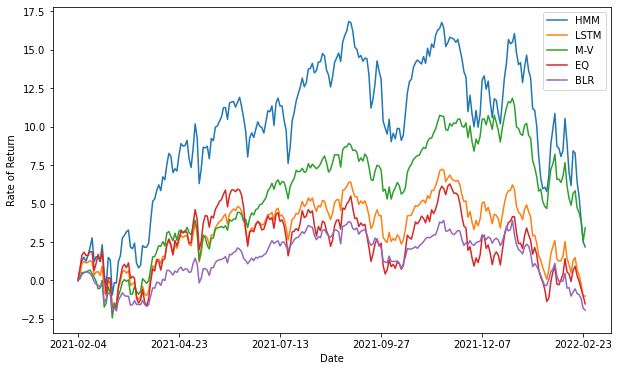

In [ ]:
((total_returns-total_returns.iloc[0,:])/total_returns.iloc[0,:] *100).plot() # RoR
plt.ylabel('Rate of Return')
plt.show()

## Rate of Return for Assets in the Test Year

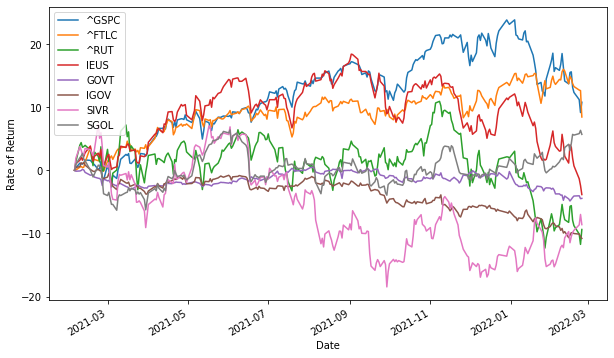

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
((stock_data.iloc[-252:,:]-stock_data.iloc[-252,:])/stock_data.iloc[-252,:] *100).plot() # RoR
plt.ylabel('Rate of Return')
plt.show()

## Rate of Return for Assets in the Training Data

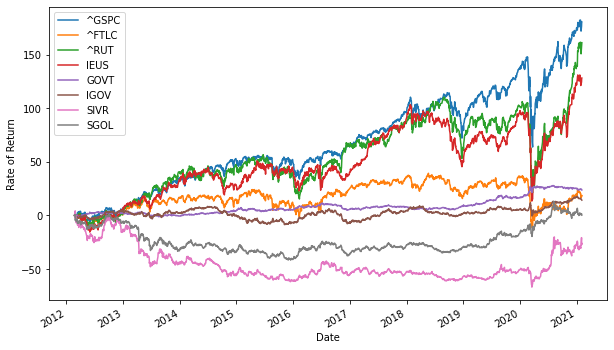

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
((stock_data.iloc[:-252,:]-stock_data.iloc[0,])/stock_data.iloc[0,:] *100).plot() # RoR
plt.ylabel('Rate of Return')
plt.show()